# Following along with Andrej Karpathy's micrograd tutorial


In [26]:
import sys

print(sys.executable)


/Users/sdbuch/anaconda3/bin/python


In [27]:
# Micrograd core: Value class


class Value:
    def __init__(self, data: float, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out


In [28]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label="f")
L = d * f
L


Value(data=-8.0)

In [29]:
from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    for n in nodes:
        dot.node(name=str(id(n)), label="{ %s | data %.4f }" % (n.label, n.data), shape="record")
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)), label=n2._op)
    return dot

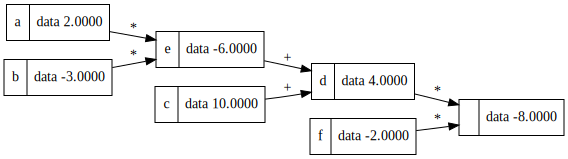

In [30]:
draw_dot(L)